In [1]:
# Menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv("//content/drive/MyDrive/Hisyam Wildan Alfath/Semester 7/Machine Learning/Pertemuan 3/Praktikum dan Tugas Mandiri 03/data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
X = df[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']]
y = df['cnt']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi pada data test
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
print('R2:', r2)

MAE: 617.3930656443376
MSE: 691035.0082022651
R2: 0.8276670090367212


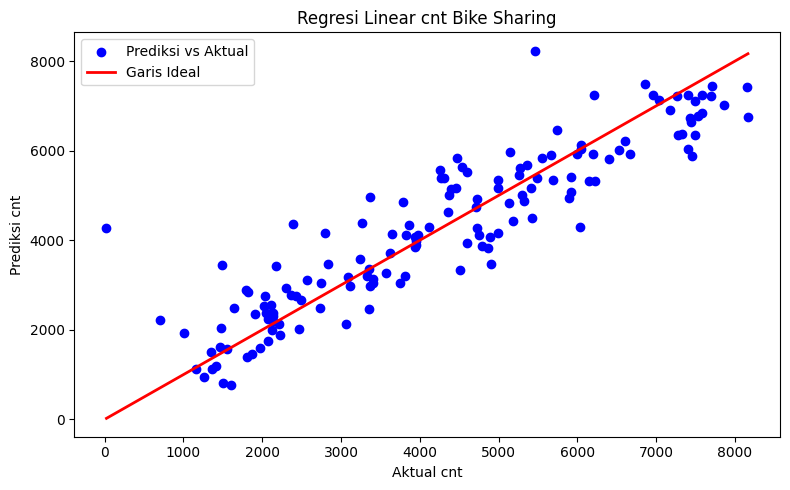

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Aktual')
plt.xlabel('Aktual cnt')
plt.ylabel('Prediksi cnt')
plt.title('Regresi Linear cnt Bike Sharing')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Garis Ideal')
plt.legend()
plt.tight_layout()
plt.show()